## ACME INSURANCE 

### Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Analysis and Visualization

In [6]:
import plotly.express as px
import matplotlib as ml
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#shows chart in this notebook only

In [7]:
sns.set_style('whitegrid')
ml.rcParams['font.size'] = 14 #rcParams is a dictionary that controls default settings
ml.rcParams['figure.figsize'] = (10,6)
ml.rcParams['figure.facecolor'] = 'white'

In [8]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
figure = px.histogram(df,
                  x = 'age',
                  marginal = 'box' ,
                  nbins=40,
                   title = 'Distribution of Age')
figure.update_layout(
                    bargap = 0.02,
                    width = 1000,
                    height = 600)
figure.show()


In [10]:
fig = px.histogram(df,
                  x = 'bmi' ,
                  marginal = 'box',
                  color_discrete_sequence = ['seagreen'],
                  title = 'Distribution of BMI (Body Mass Index)'
                  )
fig.update_layout(
                bargap=0.02,
                width = 1000,
                height = 600)
fig.show()

## Charges

In [11]:
fig = px.histogram(df,
                  x = 'charges',
                  marginal = 'box',
                  color = 'smoker',
                  color_discrete_sequence = ['red', 'green'],
                  title = 'Annual Medical Charges')
fig.update_layout(
                 bargap=0.02,
                 width = 1000,
                 height = 600)
fig.show()

In [12]:
fig = px.violin(df,
                x = 'children',
                y = 'charges',
                box = True,
                points ='all',
                color = 'children',
                title = 'Violin Plot : Charges by Number of Children')

fig.update_layout(width = 900, height = 500)
fig.show()



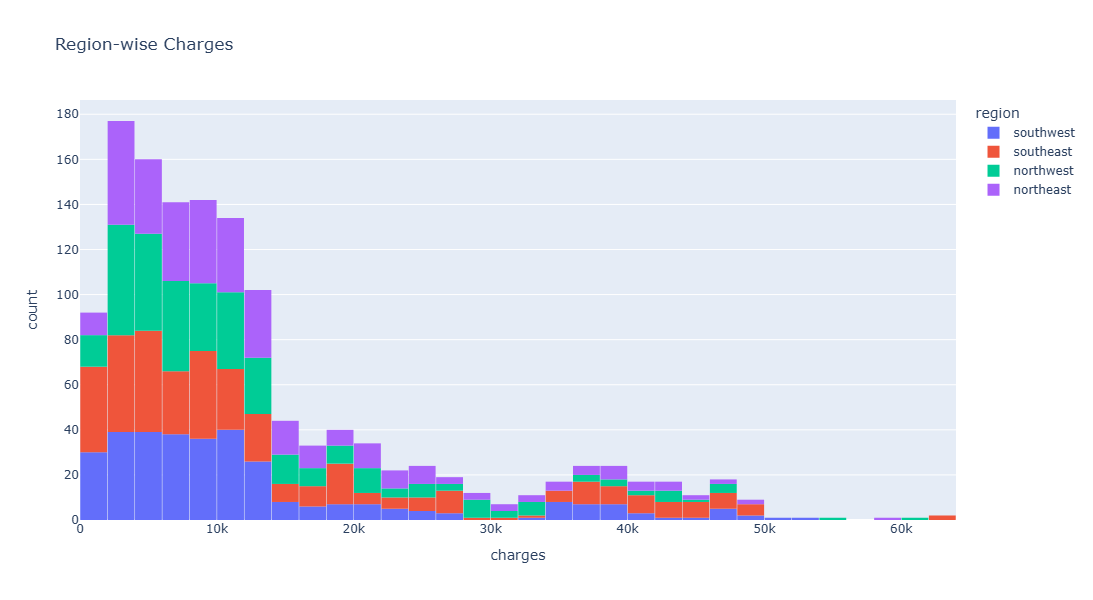

In [13]:
fig = px.histogram(df,
                  x = 'charges',
                  color = 'region',
                  title = 'Region-wise Charges')
fig.update_layout(
                 bargap = 0.02,
                 width = 1000,
                 height = 600
                    )
fig.show()

In [14]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

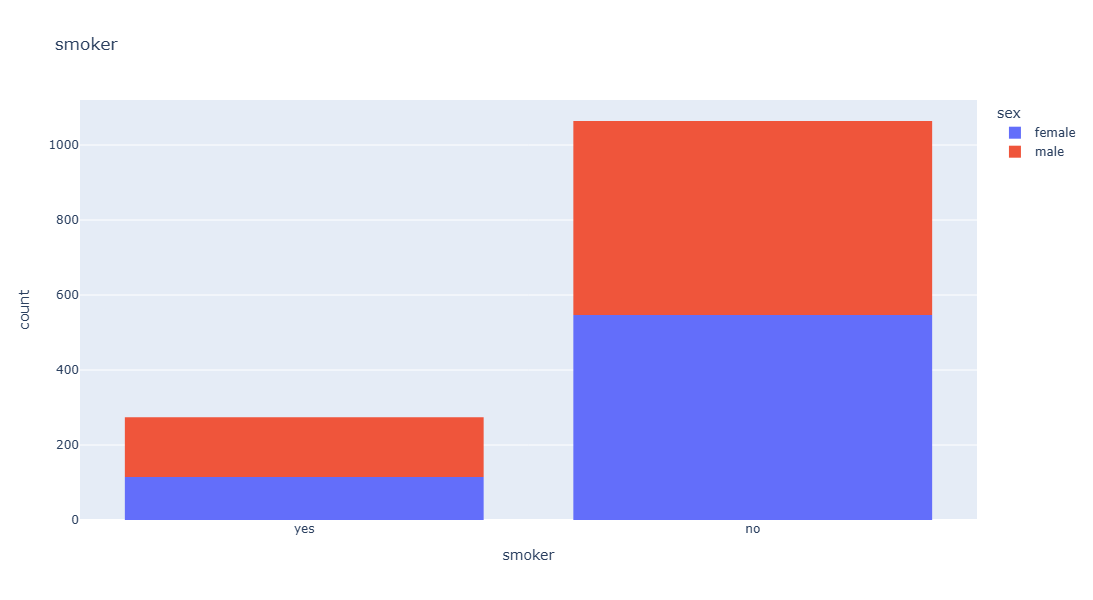

In [15]:
fig = px.histogram(df, x='smoker', color = 'sex', title = 'smoker')
fig.update_layout(
                 width = 600,
                 height = 600,
                    )


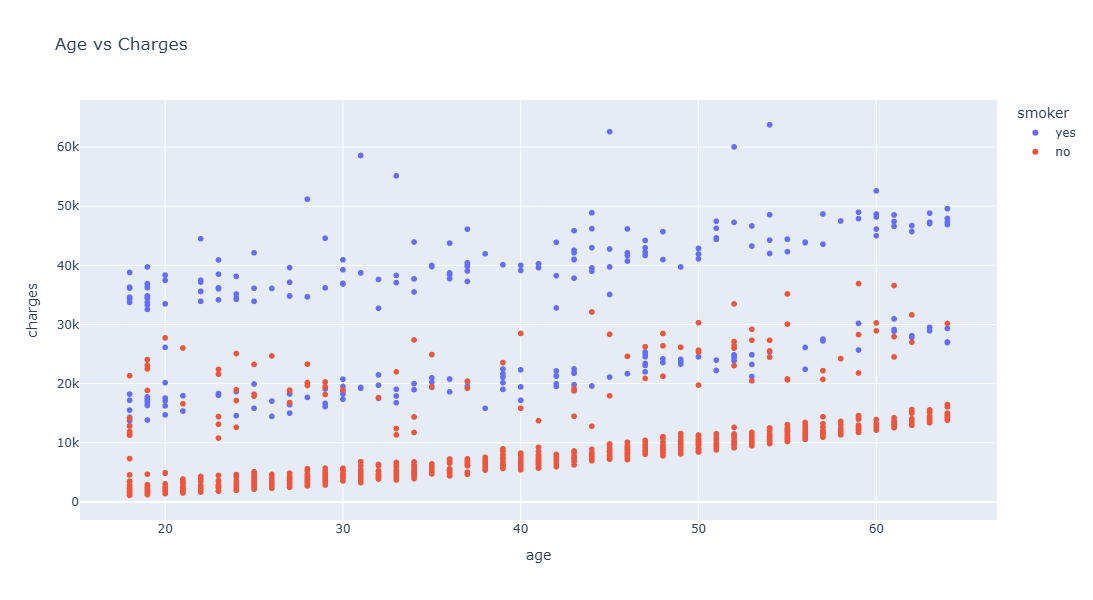

In [16]:
fig = px.scatter(df,
                x = 'age',
                y = 'charges',
                color = 'smoker',
                hover_data = ['sex'],
                title = 'Age vs Charges')
fig.update_layout( width = 900,
                 height = 600)
fig.show()

## BMI & Charges

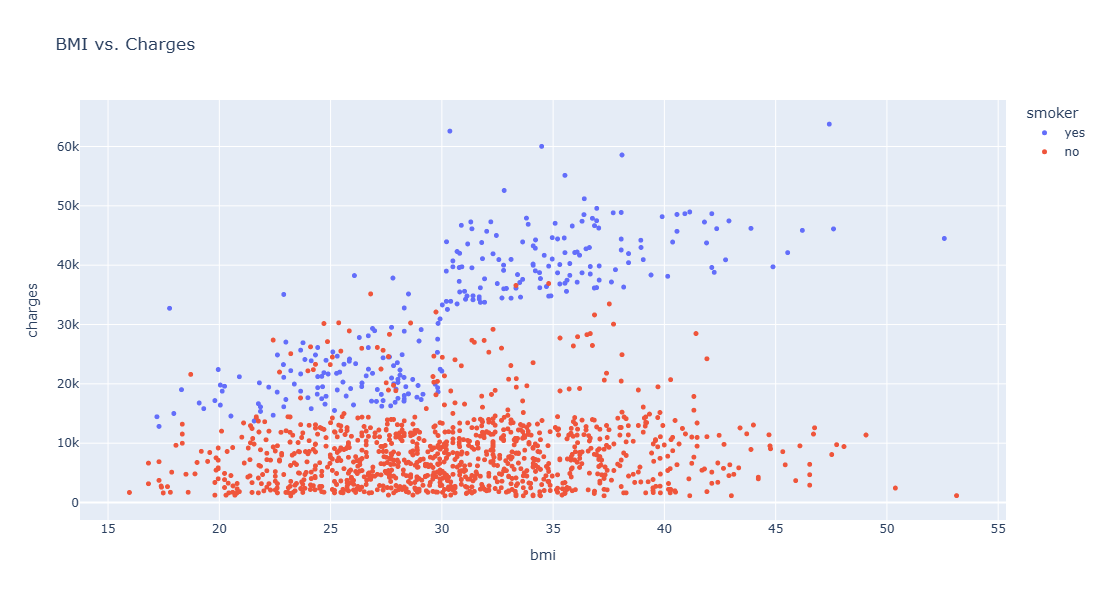

In [17]:
fig = px.scatter(df,
                x = 'bmi',
                 y = 'charges',
                color = 'smoker',
                hover_data = ['sex','age'],
                title = 'BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.update_layout( width = 900,
                 height = 600)
fig.show()

## Correlation

In [18]:
df.charges.corr(df.age)

np.float64(0.2990081933306478)

In [19]:
df.charges.corr(df.bmi)

np.float64(0.19834096883362887)

## Encoding

In [20]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

In [21]:
sex_values = {'male': 0, 'female': 1}
sex_numeric = df.sex.map(sex_values)
df.charges.corr(sex_numeric)


np.float64(-0.05729206220202533)

In [22]:
df_numeric = df.select_dtypes(include='number')
corr_matrix = df_numeric.corr()
print(corr_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

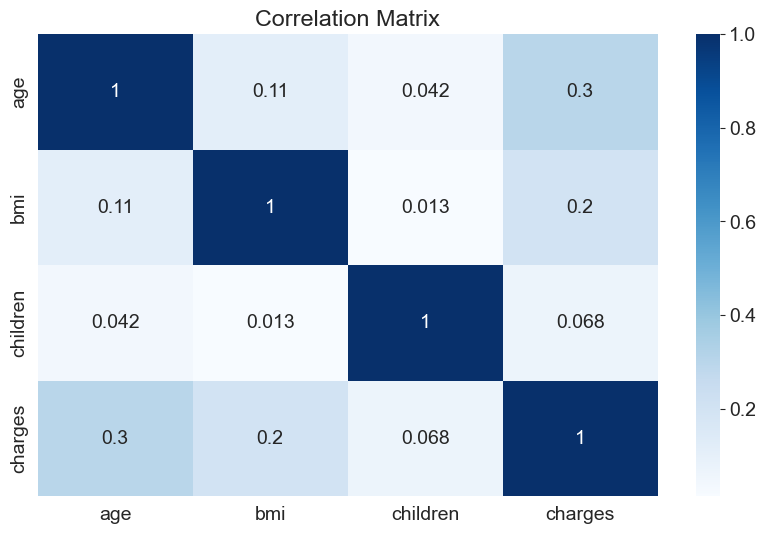

In [23]:
sns.heatmap(corr_matrix, cmap='Blues', annot=True)
plt.title('Correlation Matrix')

## Linear Regression using a Single Feature
### Without the LinearRegression lib

In [24]:
non_smoker_df = df[df.smoker == 'no']

Text(0.5, 1.0, 'Age vs. Charges')

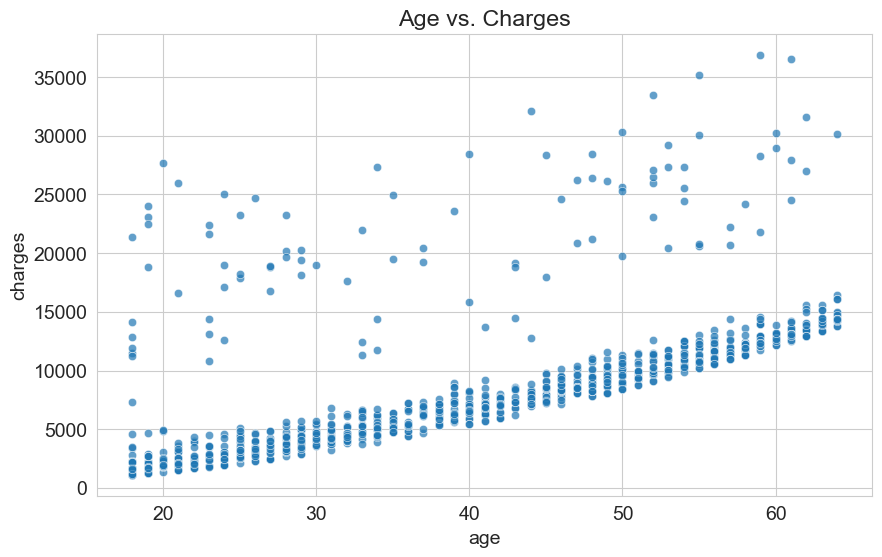

In [25]:
sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges', alpha=0.7)
plt.title('Age vs. Charges')

## First Model


In [26]:

def estimate_charges(age, w, b):
    return w * age + b
#charges = w*age +b (w and b are the weights of the model)

In [27]:
w = 50
b = 100

In [28]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

Text(0, 0.5, 'Estimated Charges')

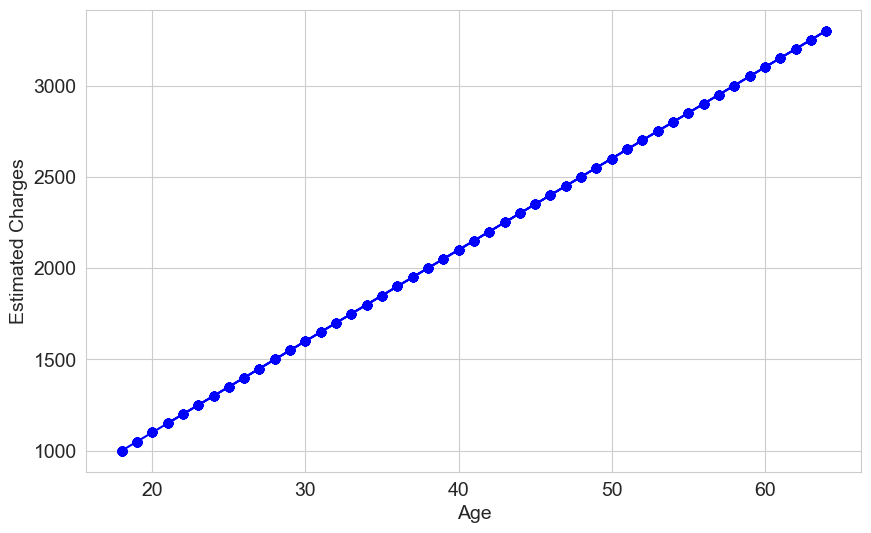

In [29]:
plt.plot(ages, estimated_charges, 'b-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges')

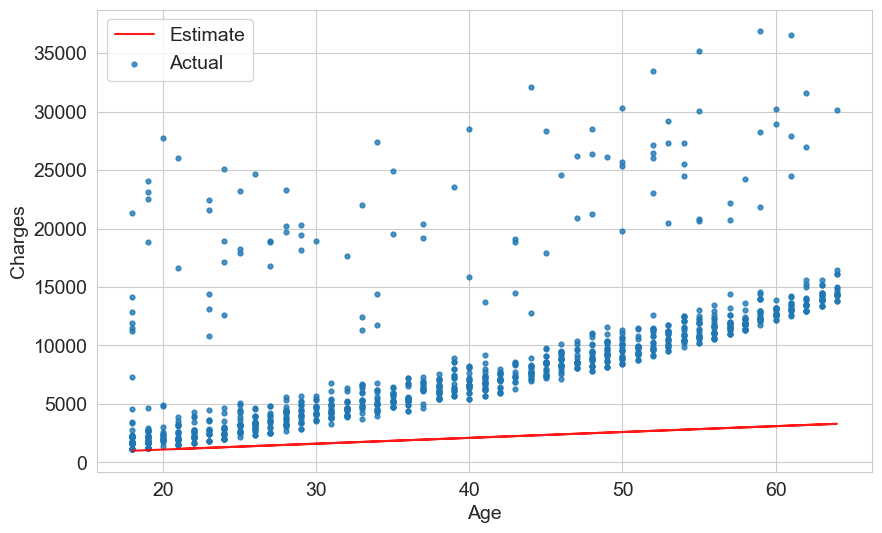

In [30]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=12, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [31]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=12, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

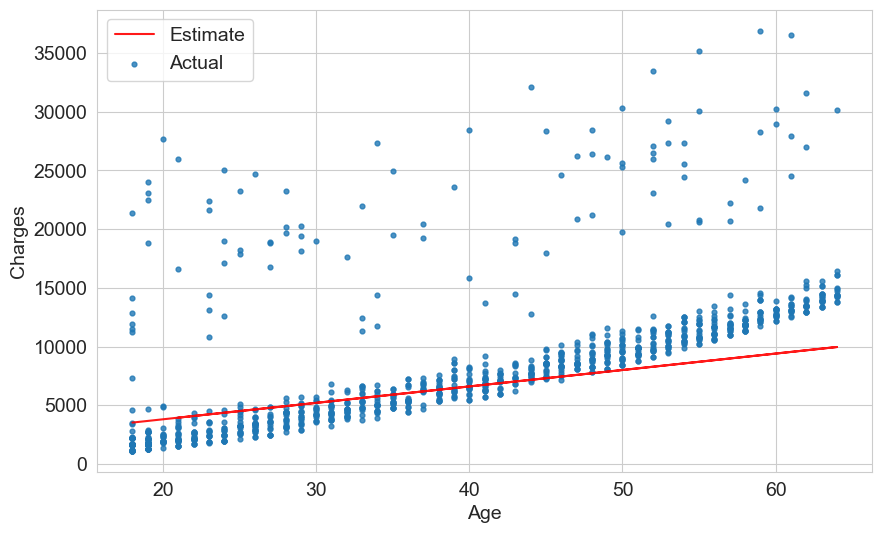

In [32]:
try_parameters(140,1000)

In [33]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [34]:
w = 170
b = 300

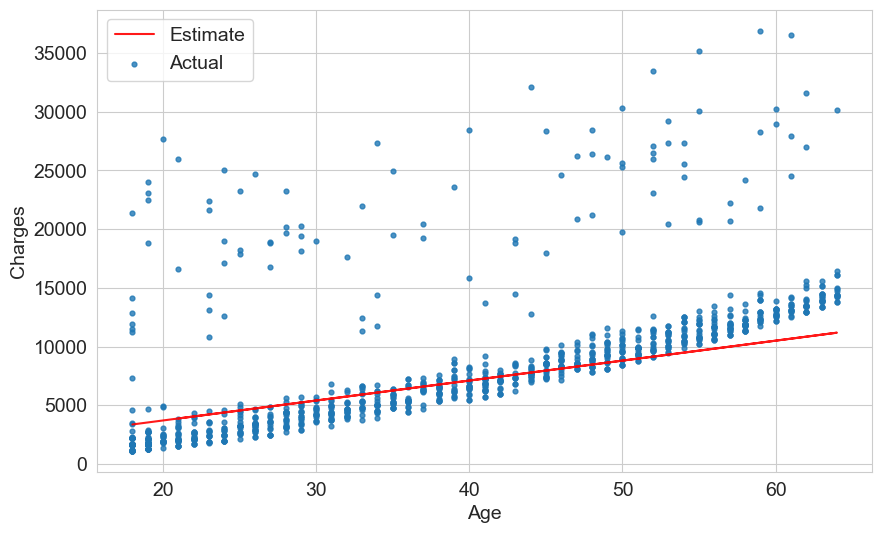

In [35]:
try_parameters(w, b)

In [36]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [37]:
rmse(targets, predicted)

np.float64(5067.842114724794)

In [38]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


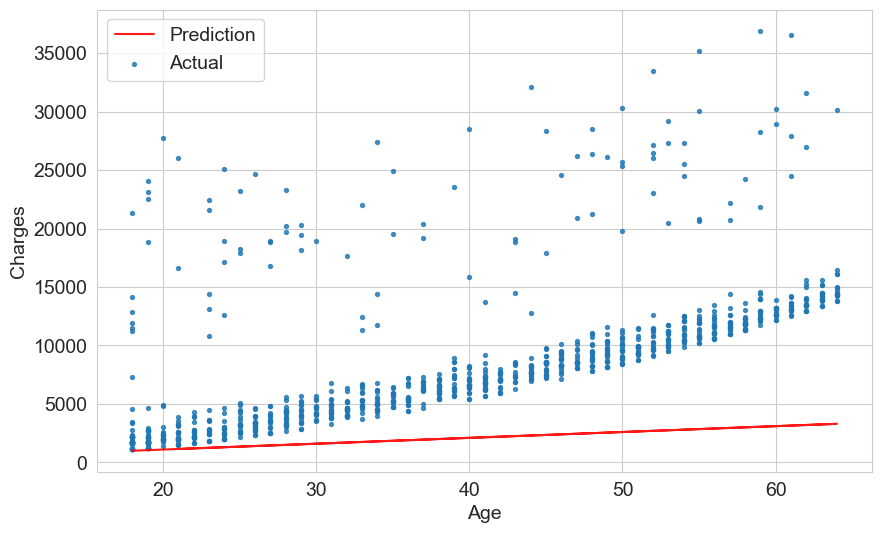

In [39]:
try_parameters(50, 100)

# Model Using Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
inputs = non_smoker_df[['age']] #to make it 2 dimensional array
targets = non_smoker_df.charges
print('input.shape :', inputs.shape)
print('targets.shape:', targets.shape)

input.shape : (1064, 1)
targets.shape: (1064,)


In [43]:
model.fit(inputs, targets)

LinearRegression()

In [44]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [45]:
model.predict(np.array([[23],
                       [37],
                       [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [46]:
predictions = model.predict(inputs)

In [47]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [48]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [49]:
#w
model.coef_

array([267.24891283])

In [50]:
#b
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss:  4662.505766636395


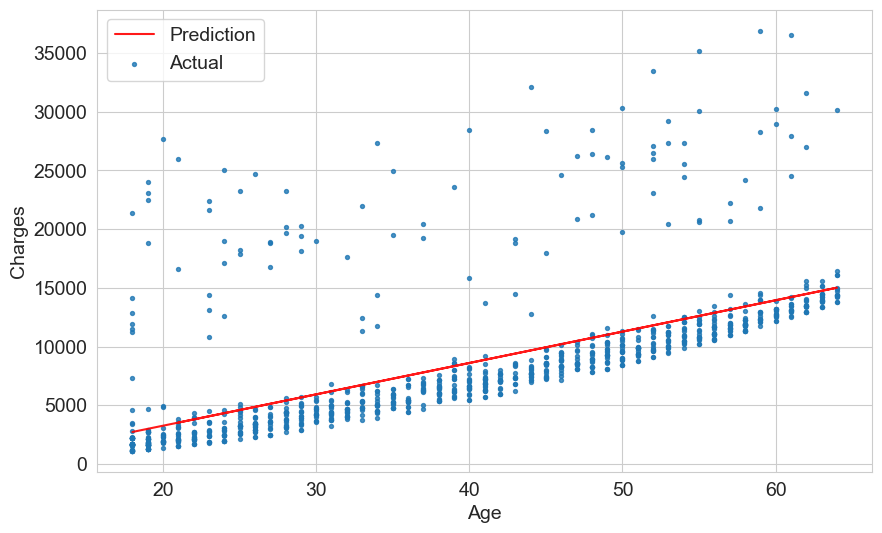

In [51]:
try_parameters(model.coef_, model.intercept_)

## Linear Regression using Multiple Features

In [52]:
#create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

#create and train the model
model3 = LinearRegression().fit(inputs, targets)

#Generate the predictions
predictions = model3.predict(inputs)

#Compute Loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [53]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.08403654312833271)

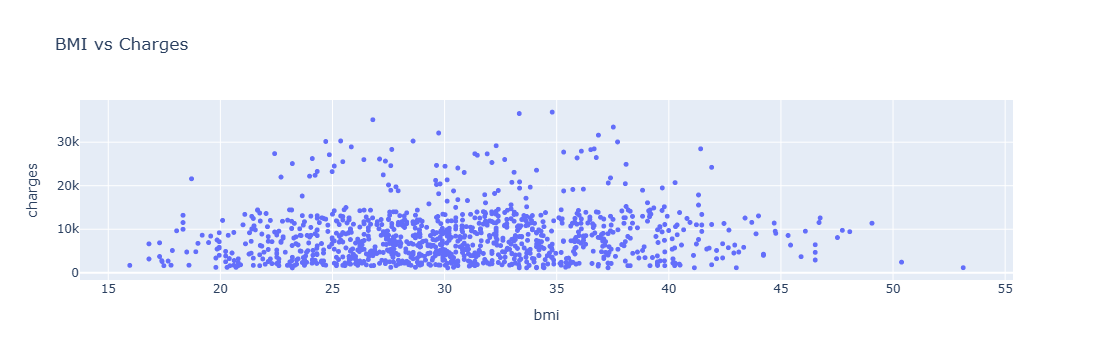

In [54]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

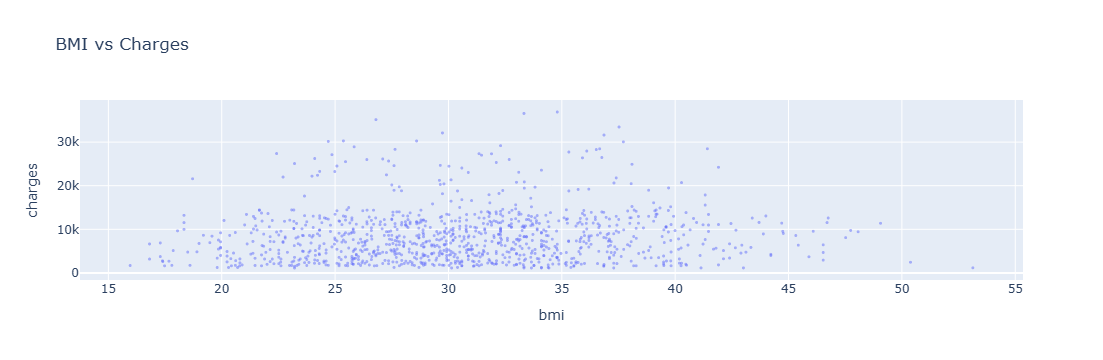

In [55]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs Charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

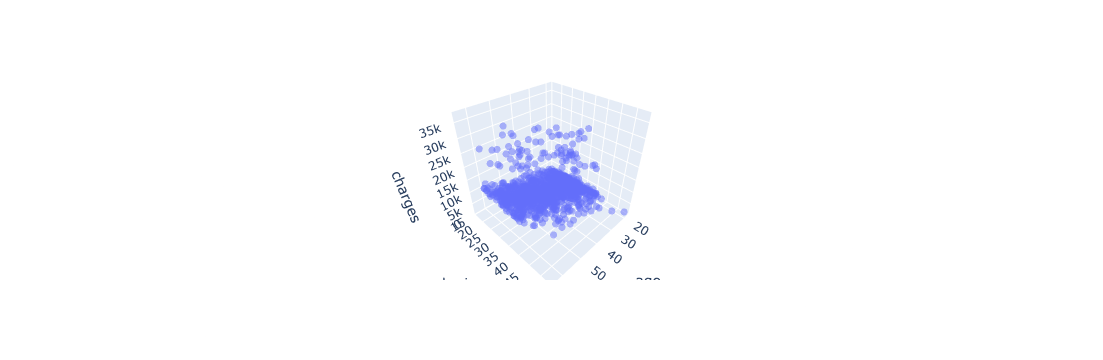

In [56]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=4, marker_opacity=0.5)
fig.show()

In [57]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542205)

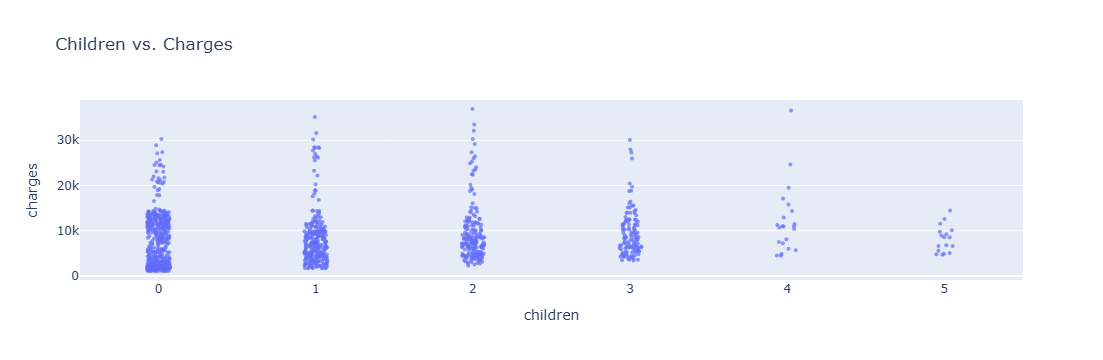

In [58]:
fig = px.strip(non_smoker_df, x='children', y='charges', title="Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [59]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038246


In [60]:
# Create inputs and targets
inputs, targets = df[['age', 'bmi', 'children']], df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


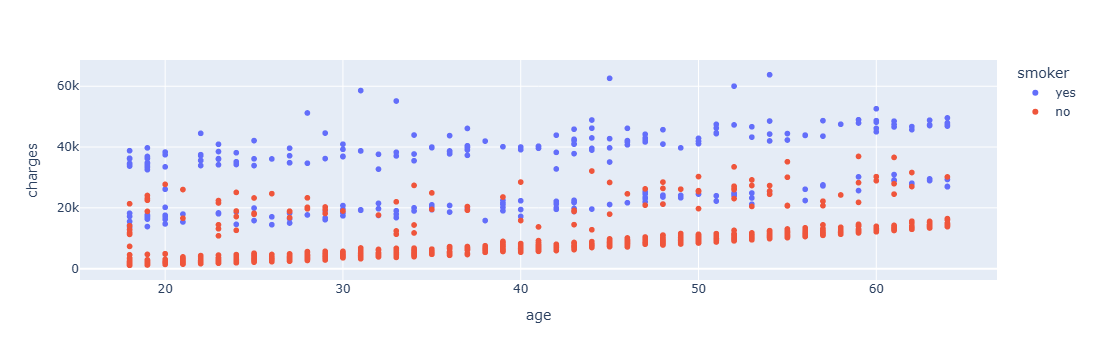

In [61]:
px.scatter(df, x='age', y='charges', color='smoker')

## Using Categorical Features for Machine Learning

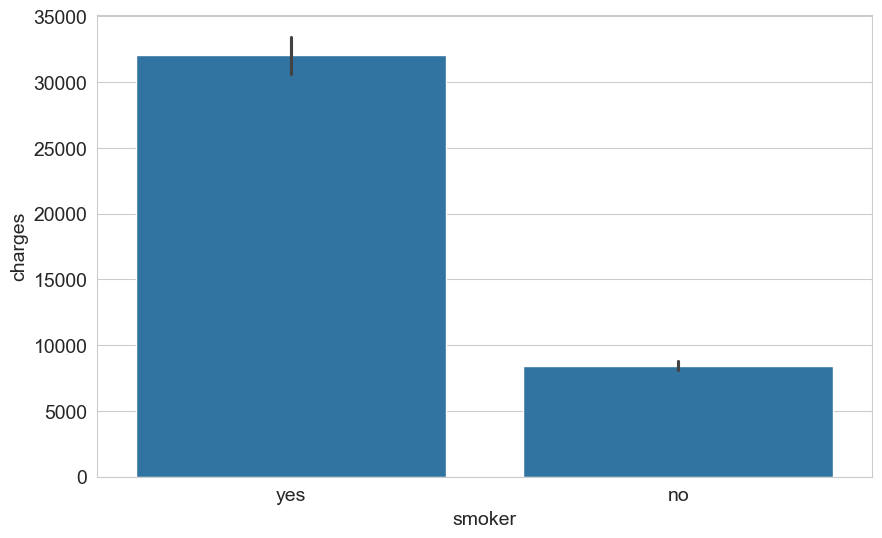

In [62]:
sns.barplot(data=df, x='smoker', y='charges');

In [63]:
smoker_codes = {'no': 0, 'yes': 1}
df['smoker_code'] = df.smoker.map(smoker_codes)

In [64]:
df.charges.corr(df.smoker_code)

np.float64(0.7872514304984778)

In [65]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [66]:
#Create inputs and targets
inputs02, targets02 = df[['age', 'bmi', 'children', 'smoker_code']], df['charges']

#Create and train the model
model = LinearRegression().fit(inputs02, targets02)

#Generate Predictions
predictions = model.predict(inputs02)

#compute loss to evaluate the model
loss = rmse(targets02, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

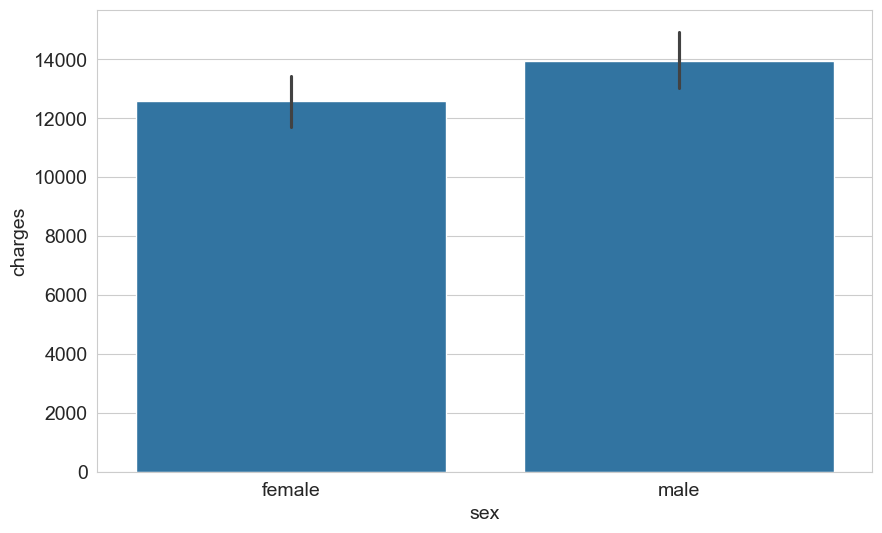

In [67]:
sns.barplot(df, x = 'sex', y = 'charges')

In [68]:
sex_codes = {'female' : 0, 'male' : 1}

In [69]:
df['sex_codes'] = df.sex.map(sex_codes)

In [70]:
df.charges.corr(df.sex_codes)

np.float64(0.05729206220202533)

In [71]:
#Create inputs and targets
inputs03, targets03 = df[['age', 'bmi', 'children', 'smoker_code', 'sex_codes']], df['charges']

#Create and train the model
model = LinearRegression().fit(inputs03, targets03)

#Generate Predictions
predictions = model.predict(inputs03)

#compute loss to evaluate the model
loss = rmse(targets03, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

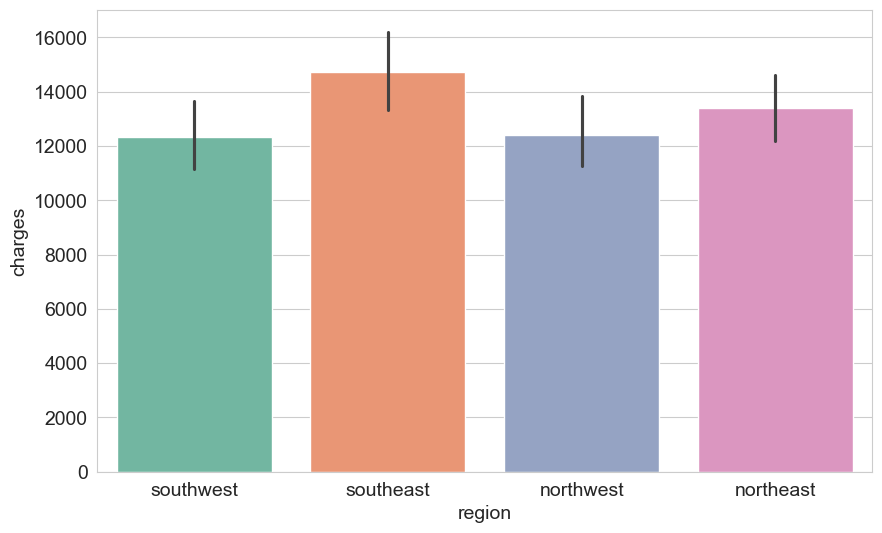

In [72]:
sns.barplot(df, x = 'region' , y = 'charges', hue = 'region', palette = 'Set2')

## One Hot Encoding 

In [73]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [74]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [75]:
#Sving it in original dataset
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

#Create Inputs and Targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest'] 
inputs4, targets4 = df[input_cols], df['charges']

#Create and train the model
MODEL = LinearRegression().fit(inputs4, targets4)

#Generate Predictions
predictions = MODEL.predict(inputs4)

#Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [76]:
MODEL.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0]])

array([29875.81463599])

In [77]:
MODEL.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [78]:
MODEL.intercept_

np.float64(-12525.54781119545)

In [79]:
weights_df = pd.DataFrame({
    'feature' : np.append(input_cols, 1),
    'weight' : np.append(MODEL.coef_, MODEL.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_codes,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [82]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [83]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [84]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [85]:
cat_cols = ['smoker_code', 'sex_codes', 'northeast', 'northwest', 'southeast', 'southwest']
cat_data = df[cat_cols].values

In [86]:
inputs = np.concatenate((scaled_inputs, cat_data), axis = 1)
targets = df.charges

#Create and train model
model1 = LinearRegression().fit(inputs, targets)

#Generate Predictions
predictions = model1.predict(inputs)

#Computing Loss
loss = rmse(targets, predictions)
print('Loss:' , loss)

Loss: 6041.679651174452


In [87]:
model1.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [88]:
model1.intercept_

np.float64(8466.483215411834)

In [89]:
weights_df = pd.DataFrame({
    'feature' : np.append(numeric_cols + cat_cols, 1),
    'weight' : np.append(model1.coef_, model1.intercept_)
})
weights_df.sort_values('weight', ascending = False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_codes,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.25)

In [92]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5886.095001260717


In [93]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6102.130779843218


## ✅ Final Model Evaluation Summary

After incorporating all relevant features, we trained a Linear Regression model on 75% of the data and tested on the remaining 25%.

### 🔍 Model Performance:
- **Training RMSE**: ₹5905
- **Test RMSE**: ₹6453
- The small gap between train and test errors suggests the model generalizes well and is not overfitting.

### 📉 Insight:
- While the model performs reasonably, the RMSE indicates an average error of ~₹6000 in predictions.
- This implies that linear regression may not be capturing the non-linear or interaction effects in the dataset.
